# IPML Project: Implementing CNN model from scratch

In [4]:
# Importing necessary libraries
import os
import numpy as np           
import matplotlib.pyplot as plt

# Pre-processing the data

In [5]:
import cv2
from PIL import Image
from PIL import ImageFile
from keras.preprocessing import image 

def increaseBrightness(img, value):
    # Converting BGR to HSV space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Splitting into individual channels as we need to deal with brightness i.e. "v"
    h, s, v = cv2.split(hsv)

    # Just making sure the value doesn't exceed the limit i.e. 255
    lim = 255 - value
    
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    
    # Converting it back to BGR
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

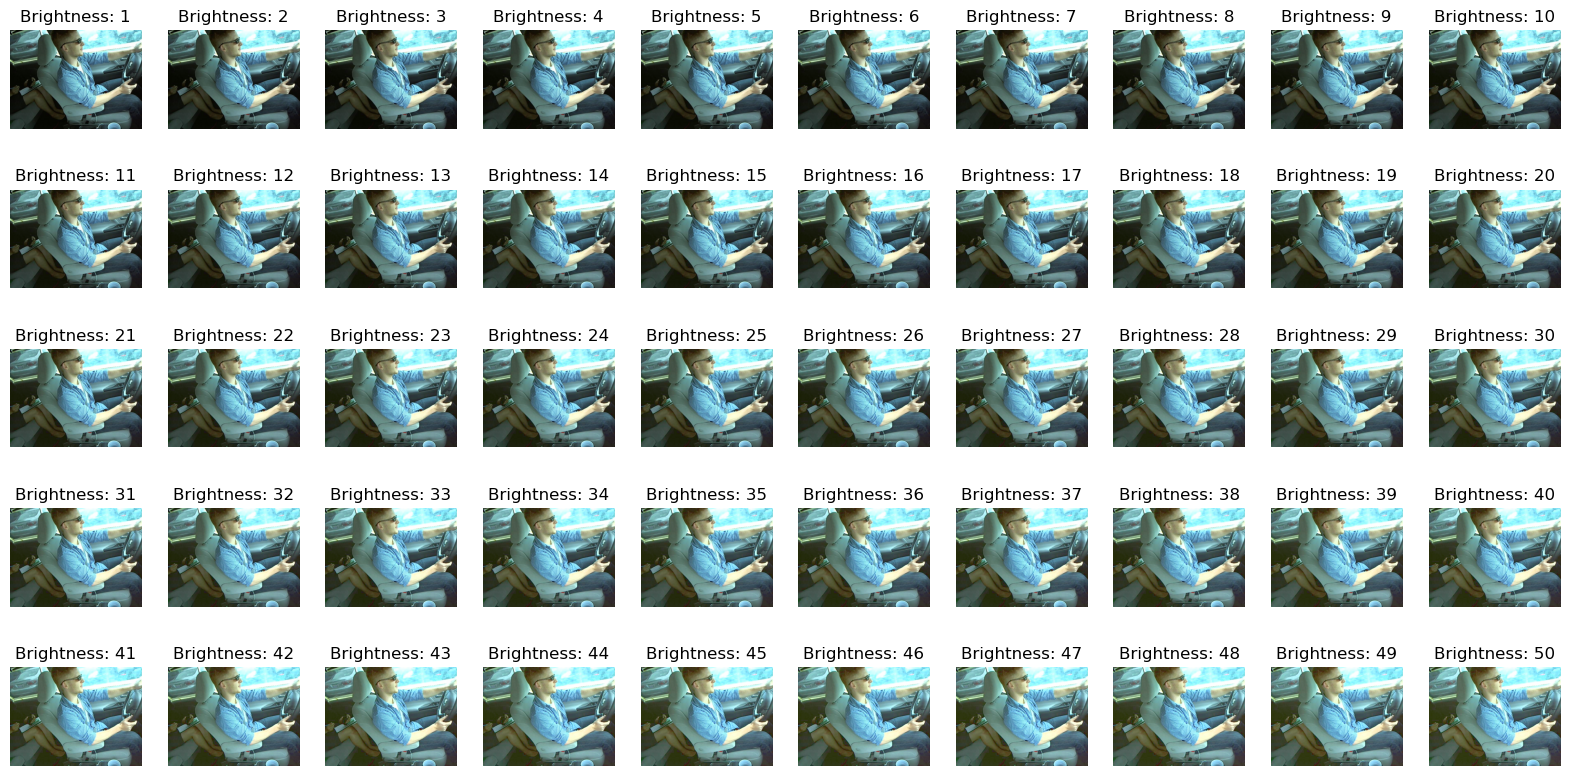

In [6]:
# Load an image
img = cv2.imread('/kaggle/input/dataleaks/DataLeaks_train/c0/img_100026.jpg')

# Print the adjusted image for brightness values 1 to 50
fig, ax = plt.subplots(5, 10, figsize=(20, 10))
ax = ax.flatten()
for i in range(1, 51):
    adjusted_img = increaseBrightness(img, i)
    ax[i-1].imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
    ax[i-1].set_title(f'Brightness: {i}')
    ax[i-1].axis('off')
plt.show()

In [7]:
def changeContrast(img, level):
    # Converting image to PIL object
    img = Image.fromarray(img.astype('uint8'))
    # Calculationg a factor.
    # Multipled by 259 so as to scale the value in the range 0-255
    # Ensures that the pixel values are not clipped, and the full range of 0-255 is used.
    
    # (From grayscale to RBG when multipled by 255 can clip pixels if contrast is high)
    # Thus using maximum value that can be obtained from the formula
    # Y = 0.299 * 255 + 0.587 * 255 + 0.114 * 255 = 259
    factor = (259 * (level + 255)) / (255 * (259 - level))
    
    # Helper function - applying contrast to every pixel
    def contrast(c):
        return int(128 + factor * (c - 128))
    return np.array(img.point(contrast))

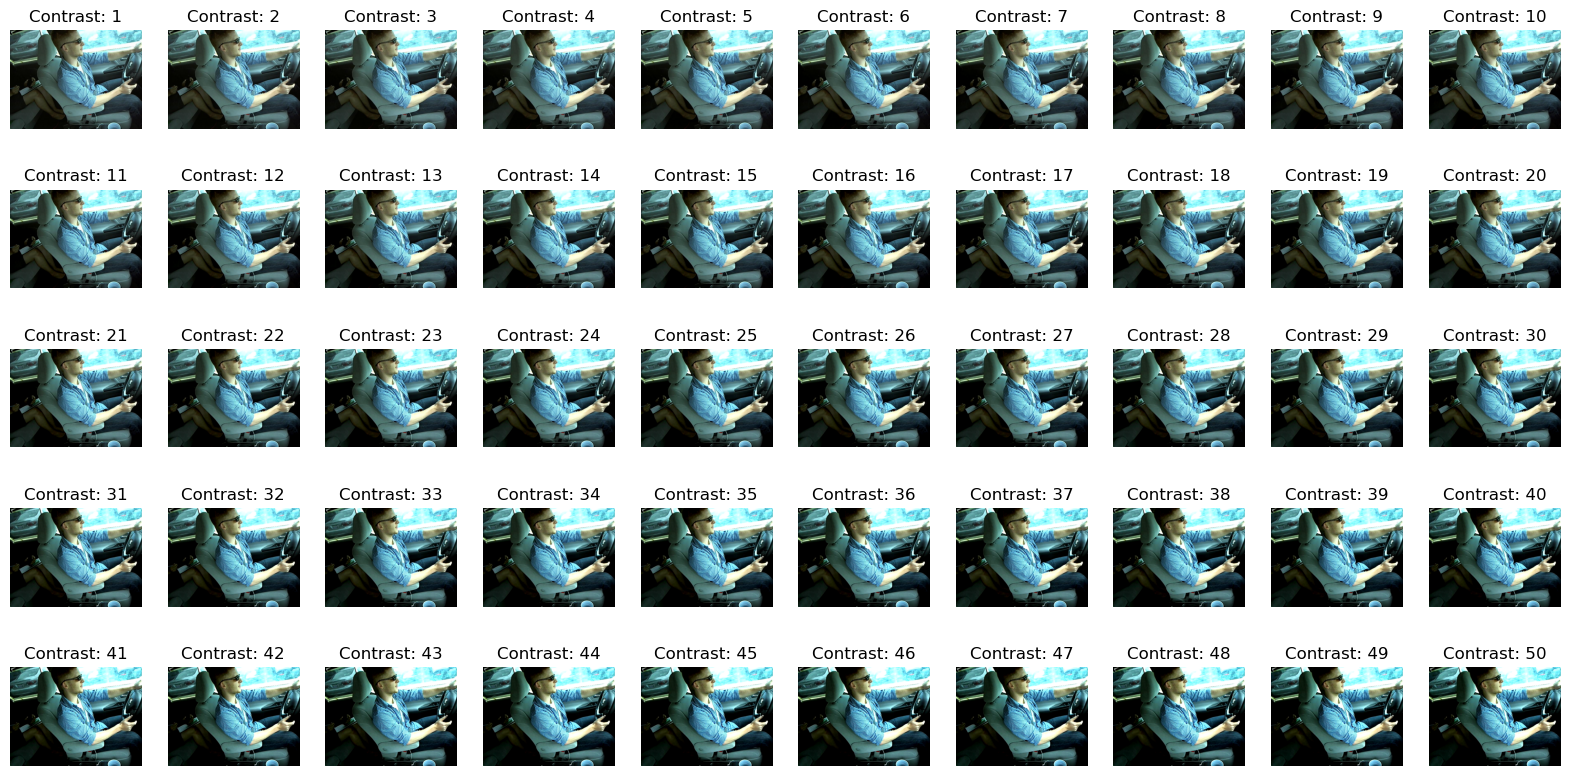

In [8]:
# Load an image
img = cv2.imread('/kaggle/input/dataleaks/DataLeaks_train/c0/img_100026.jpg')

# Print the adjusted image for contrast values 1 to 50
fig, ax = plt.subplots(5, 10, figsize=(20, 10))
ax = ax.flatten()
for i in range(1, 51):
    adjusted_img = changeContrast(img,i)
    ax[i-1].imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
    ax[i-1].set_title(f'Contrast: {i}')
    ax[i-1].axis('off')
plt.show()

In [9]:
def change_contrast(image, level):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the mean pixel value
    mean = gray.mean()

    # Calculate the new pixel value using the level
    new_mean = mean + level
    alpha = new_mean / mean

    # Apply the contrast adjustment
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=0)

    return adjusted

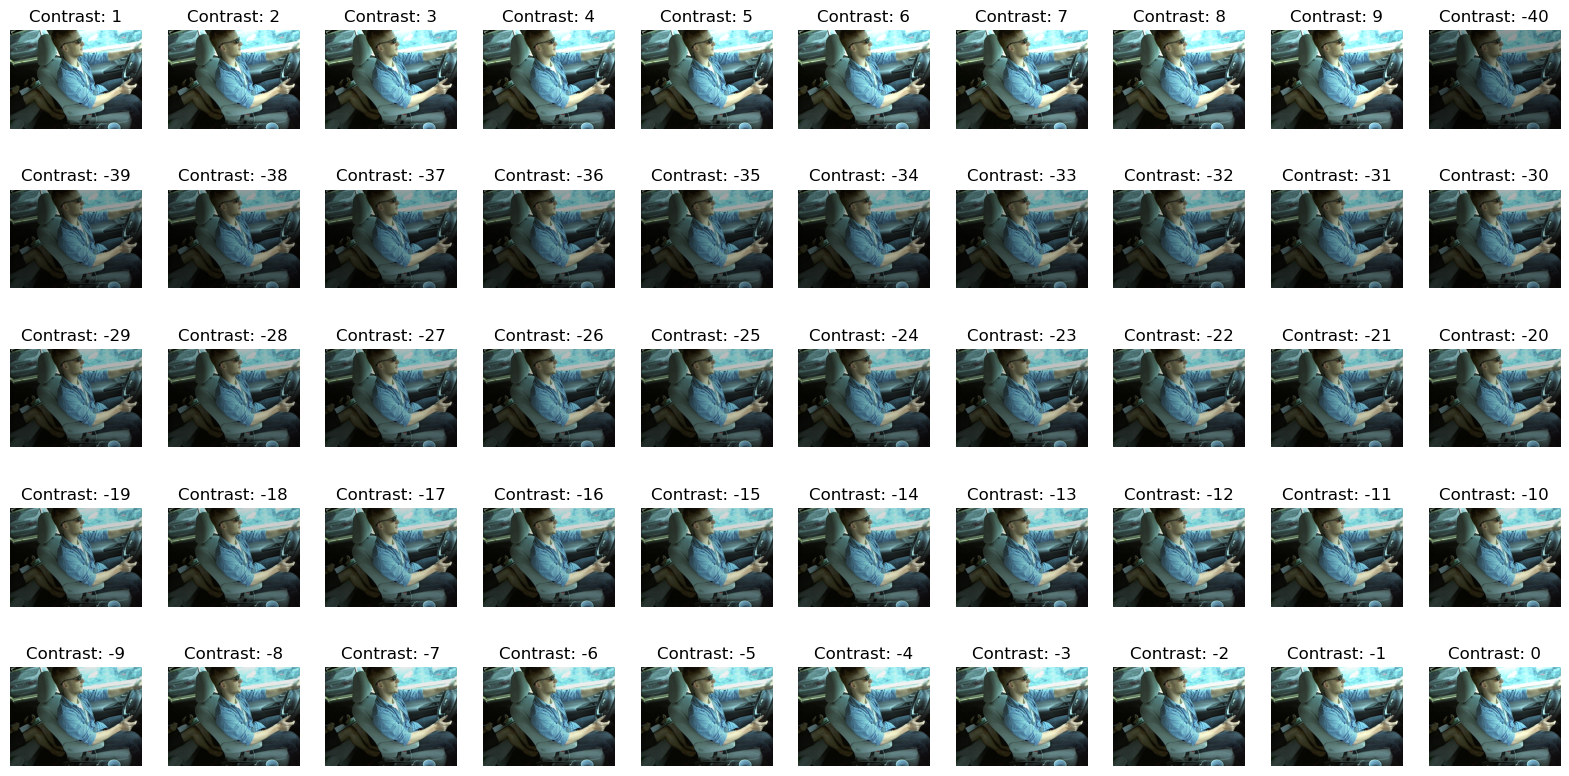

In [10]:
# Load an image
img = cv2.imread('/kaggle/input/dataleaks/DataLeaks_train/c0/img_100026.jpg')

# Print the adjusted image for contrast values 1 to 50
fig, ax = plt.subplots(5, 10, figsize=(20, 10))
ax = ax.flatten()
for i in range(-40, 10):
    adjusted_img = change_contrast(img,i)
    ax[i-1].imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
    ax[i-1].set_title(f'Contrast: {i}')
    ax[i-1].axis('off')
plt.show()

In [11]:
# PreProcess - Contrast adjustment function 01
# Performing Adaptive Histogram Equalization (AHE) on an input image.
from skimage import data, exposure

def AdaptiveHistogramEqualization(image):
    # Convert from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply adaptive histogram equalization
    imageAdaptedHE = exposure.equalize_adapthist(image, clip_limit=0.03)
    
    return imageAdaptedHE

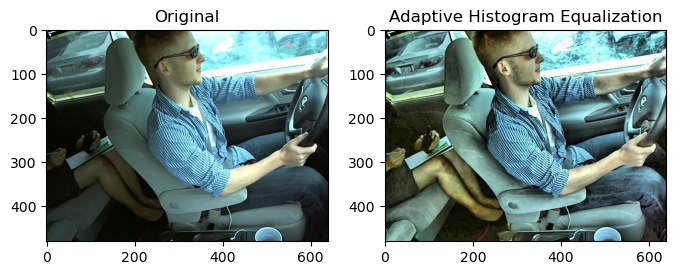

In [12]:
# Load an example image
image = cv2.imread('/kaggle/input/dataleaks/DataLeaks_train/c0/img_100026.jpg')

# Convert from BGR to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply adaptive histogram equalization
image_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

# Display the original and equalized image
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
ax1.imshow(image)
ax1.set(title='Original')
ax2.imshow(image_adapteq)
ax2.set(title='Adaptive Histogram Equalization')
plt.show()

In [13]:
# PreProcess - Contrast adjustment function 02
# Performing Contrast Limited Adaptive Histogram Equalization (CLAHE) on an input image.
# Prevents over-amplification of noise resulted from adaptive histogram equalization (AHE).

# Use this as preProcessing function in next model*
def ContrastLimitedAHE(image, clip_limit=0.1, tile_grid_size=(8,8)):
    
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Applying ContrastLimitedAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    lab_image[:,:,0] = clahe.apply(lab_image[:,:,0])

    # Convert the image back to BGR color space
    equalized_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

    return equalized_image

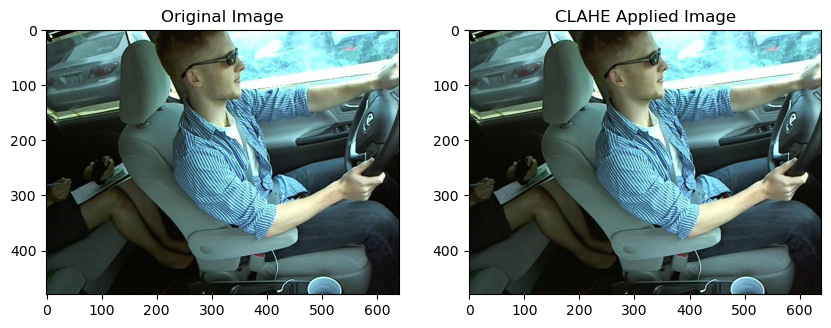

In [14]:
# Load an example image
image = cv2.imread('/kaggle/input/dataleaks/DataLeaks_train/c0/img_100026.jpg')

# Apply CLAHE to the image
clahe_img = ContrastLimitedAHE(img)

# Display the original and equalized image side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax1, ax2 = axes.ravel()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("Original Image")
ax2.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
ax2.set_title("CLAHE Applied Image")
plt.show()

In [15]:
import secrets

def preprocessImg(img):
    img = np.array(img)

    # Randomly setting the order of operations.
    x = secrets.randbelow(2)

    if x == 0:
        #Order 01
        img = increaseBrightness(img, secrets.randbelow(26))
        img = changeContrast(img, secrets.randbelow(51))
    else:
        #Order 02
        img = changeContrast(img, secrets.randbelow(51))
        img = increaseBrightness(img, secrets.randbelow(26))

    # Convert the pixel values back to integer format
    # img = img.astype(np.uint8)
    return img

# Data Leakage Solution

In [16]:
import pandas as pd

driverData = pd.read_csv("/kaggle/input/c/state-farm-distracted-driver-detection/driver_imgs_list.csv")

In [ ]:
driverData.columns

In [ ]:
driverList = driverData["subject"].unique()
driverClassList = driverData["classname"].unique()

In [ ]:
len(driverList)

In [ ]:
trainDriverList = driverList[:20]
testDriverList = driverList[20:]

In [ ]:
print("trainDriverSet: ", len(trainDriverList))
print("testDriverSet: ", len(testDriverList))

In [ ]:
driverData.shape

In [ ]:
driverClassList

In [ ]:
# Source directory containing the image files
source_directory = '/kaggle/input/c/state-farm-distracted-driver-detection/imgs/train'
destination_directoryTrain = '/kaggle/working/dataLeakSet/train/'
destination_directoryTest = '/kaggle/working/dataLeakSet/test/'

In [ ]:
import os
# Creating folders as per classes
for i in driverClassList:
    os.makedirs(os.path.join("/kaggle/working/dataLeakSet/train",i))
    os.makedirs(os.path.join("/kaggle/working/dataLeakSet/test",i))

In [ ]:
!ls /kaggle/working/dataLeakSet/train

In [ ]:
import shutil

In [ ]:
for i in range(driverData.shape[0]):
    if(driverData.loc[i, "subject"] in trainDriverList):
        shutil.copy(source_directory+"/"+driverData.loc[i,"classname"]+"/"+driverData.loc[i,"img"], destination_directoryTrain+driverData.loc[i,"classname"])
    else:
        shutil.copy(source_directory+"/"+driverData.loc[i,"classname"]+"/"+driverData.loc[i,"img"], destination_directoryTest+driverData.loc[i,"classname"])

# Splitting the data into train, validation and test

In [17]:
!pip install split-folders

In [18]:
import splitfolders

mydata = '/kaggle/input/dataleaks/DataLeaks_train/'
splitfolders.ratio(mydata, output="mydata",
    seed=1337, ratio=(.8,.20), group_prefix=None, move=False)

Copying files: 17778 files [02:12, 134.06 files/s]


In [19]:
!ls /kaggle/working/mydata

train  val


In [20]:
# Saving the path for train data
trainDir = "/kaggle/input/dataleaks/DataLeaks_train"

# Directory paths after splitting
train = '/kaggle/working/mydata/train'
val = '/kaggle/working/mydata/val'
test = '/kaggle/input/dataleaks/DataLeaks_test'

# Saving the path for models
modelPath = "/kaggle/working/model"

In [21]:
# Initializing the parameters for Augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train = ImageDataGenerator(
    rotation_range = 5,
    width_shift_range = 0.02,
    height_shift_range = 0.02,
    shear_range = 0.01,
    zoom_range = 0.05,
    horizontal_flip = False,
    fill_mode = "nearest",
#     validation_split = 0.2,
    preprocessing_function = preprocessImg
)

# Note we do not apply augmentations on val/test data.
datagen_val_test = ImageDataGenerator(
    preprocessing_function = preprocessImg
)

In [22]:
train_data = datagen_train.flow_from_directory(train,
                                        # For new architecture - change image size to 64x64
                                        target_size=(224,224), # Resize image to this
                                        batch_size=128, # Batch size
#                                         color_mode = "grayscale",
                                        shuffle=False)

val_data = datagen_val_test.flow_from_directory(val,
                                        target_size=(224,224),
                                        batch_size=128,
#                                         color_mode = "grayscale",
                                        shuffle=False)

test_data = datagen_val_test.flow_from_directory(test,
                                        target_size=(224,224),
                                        batch_size=128,
#                                         color_mode = "grayscale",
                                        shuffle=False)

Found 14219 images belonging to 10 classes.
Found 3559 images belonging to 10 classes.
Found 4646 images belonging to 10 classes.


In [ ]:
# import matplotlib.pyplot as plt

# # Get the first batch of images from the generator
# x_batch, y_batch = next(train_data)

# # Display the images in the batch
# fig, axes = plt.subplots(4, 4, figsize=(12,12))
# axes = axes.ravel()

# for i in range(16):
#     axes[i].imshow(x_batch[i])
#     axes[i].axis('off')

# plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.show()

In [ ]:
# # Old architecture
# model = Sequential()

# model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3), kernel_initializer='glorot_normal'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax', kernel_initializer='glorot_normal'))


# model.summary()

In [23]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=3))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)     

In [ ]:
# # Another architecture - New!
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64,3)))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))

# model.add(Flatten())

# model.add(Dense(1024, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(10, activation='softmax'))


# model.summary()

In [24]:
Checking = train_data.next()

In [25]:
Checking[1]
# Thus one hot encoded.

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
filepath = os.path.join(modelPath,"distracted-{epoch:02d}-{val_accuracy:.2f}.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model_history = model.fit(train_data,validation_data = val_data,epochs=15,shuffle=True,callbacks=callbacks_list)

Epoch 1/15


2023-05-16 10:27:02.688168: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


112/112 [==============================] - ETA: 0s - loss: 2.6749 - accuracy: 0.1177
Epoch 1: val_accuracy improved from -inf to 0.28632, saving model to /kaggle/working/model/distracted-01-0.29.hdf5
112/112 [==============================] - 304s 3s/step - loss: 2.6749 - accuracy: 0.1177 - val_loss: 2.0626 - val_accuracy: 0.2863
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 1.9499 - accuracy: 0.3021
Epoch 2: val_accuracy improved from 0.28632 to 0.44844, saving model to /kaggle/working/model/distracted-02-0.45.hdf5
112/112 [==============================] - 287s 3s/step - loss: 1.9499 - accuracy: 0.3021 - val_loss: 1.5810 - val_accuracy: 0.4484
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 1.5336 - accuracy: 0.4576
Epoch 3: val_accuracy improved from 0.44844 to 0.57741, saving model to /kaggle/working/model/distracted-03-0.58.hdf5
112/112 [==============================] - 284s 3s/step - loss: 1.5336 - accuracy: 0.4576 - val_loss: 1.2039

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 15, 1))
ax1.set_yticks(np.arange(0, 3, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 15, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(os.path.join(modelPath,"confusion_matrix.png"))
    return fig

In [ ]:
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels,predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

In [ ]:
ypred = model.predict(test_data)

test_list = test_data.classes.tolist()

ypred_class = np.argmax(ypred,axis=1)
ytest = test_list

In [ ]:
class_names = list()
for name,idx in test_data.class_indices.items():
    class_names.append(name)
print(class_names)

In [ ]:
print_heatmap(ytest,ypred,class_names)

In [ ]:
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

In [ ]:
model.evaluate(test_data)